# <center>Price Prediction - Uber and Lyft</center>
<center>$\it{Developed~by~Anghsuan~Wu}$</center>    

<center><img src="uber-vs-lyft-banner.jpg" width="700"></center>



## Data Overview: __[[Reference: Uber and Lyft Dataset Boston, MA]](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)__

- id - Unique identifier for each column 	
- Timestamp - Unix Timestamp	
- hour - Hour of the day	
- day - Day of the week	
- month - Month in a year	
- datetime - Date value	
- timezone - Timezone	
- source - Initial source of the ride	
- destination - Destination of the ride	
- cab_type - The type of cab 	
- price - Price of the ride	
- distance - Total distance of the requested ride	
- surge_multiplier - Times of the normal price 	
- temperature - Temperature of the ride
- apparentTemperature -	Apparent temperature of the ride
- summary - weather report summary of the day
- humidity - Humidity of the ride	
- windSpeed - Wind speed of the ride	
- windGust - Wind gust of the ride							
- uvIndex - UV index of the ride		























In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<font color='DARKGREEN'>__Read dataset and randomly select 2500 rows.__</font>

In [3]:
df_raw = pd.read_csv('Uber and Lyft.csv')
np.random.seed(500)
rows = np.random.randint(0, 637976, 2500)
df = df_raw.loc[rows].reset_index().drop(['index'], axis=1)
print('The shape of the dataset becomes {}.\n'.format(df.shape))

The shape of the dataset becomes (2500, 24).



In [4]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,21,30,11,Fenway,Back Bay,Uber,UberXL,13.0,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278,1.00,0,280.7,0.79
1,7,15,12,Financial District,South Station,Uber,WAV,14.0,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226,0.87,0,297.5,0.27
2,11,29,11,North End,West End,Lyft,Shared,3.5,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308,0.25,0,341.3,0.75
3,23,2,12,Northeastern University,North Station,Lyft,Lux Black XL,38.5,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,275,1.00,0,287.3,0.86
4,20,17,12,Financial District,Boston University,Lyft,Lux,27.5,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286,0.77,0,350.3,0.33


In [5]:
# Move column 'price' to first column in the dataframe.
s = df.pop('price')
df = pd.concat([s, df], axis=1)
df.head()

,price,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,13.0,21,30,11,Fenway,Back Bay,Uber,UberXL,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278,1.00,0,280.7,0.79
1,14.0,7,15,12,Financial District,South Station,Uber,WAV,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226,0.87,0,297.5,0.27
2,3.5,11,29,11,North End,West End,Lyft,Shared,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308,0.25,0,341.3,0.75
3,38.5,23,2,12,Northeastern University,North Station,Lyft,Lux Black XL,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,275,1.00,0,287.3,0.86
4,27.5,20,17,12,Financial District,Boston University,Lyft,Lux,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286,0.77,0,350.3,0.33


## Data Preprocessing
This section contains:
- Dealing with missing value
- Explore the data with visualization
- Data scaling

### Fill Missing Values

In [6]:
print('The distribution of NaN across each column:')
print(df.isnull().sum())

# Randomly replace 5% of records with NaN
np.random.seed(500)
df.iloc[:, 1:] = df.iloc[:, 1:].mask(
    np.random.random((df.shape[0], df.shape[1] - 1)) < 0.06)
tot_nan = df.isnull().sum().sum()
print(
    '\nAfter randomly replacing missing values, we now have {0} NaN\'s across the dataset, it\'s approximate to the\nproportion of {1:.1%} in the dataset.'
    .format(tot_nan, tot_nan / (df.shape[0] * df.shape[1])))

The distribution of NaN across each column:
price                  0
hour                   0
day                    0
month                  0
source                 0
destination            0
cab_type               0
name                   0
distance               0
surge_multiplier       0
temperature            0
apparentTemperature    0
short_summary          0
humidity               0
windSpeed              0
windGust               0
visibility             0
dewPoint               0
pressure               0
windBearing            0
cloudCover             0
uvIndex                0
ozone                  0
moonPhase              0
dtype: int64

After randomly replacing missing values, we now have 3431 NaN's across the dataset, it's approximate to the
proportion of 5.7% in the dataset.


In [7]:
# Fill NULL values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill',
          inplace=True)  # in case that having NaN in the first row

# Check NULL values
print('After dealing with missing values, we got {} NaN now.'.format(
    df.isnull().sum().sum()))

After dealing with missing values, we got 0 NaN now.


### Exploratory Data Analysis

In [8]:
df.head()

,price,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,13.0,21.0,30.0,11.0,Fenway,Back Bay,Uber,UberXL,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278.0,1.00,0.0,280.7,0.79
1,14.0,7.0,15.0,12.0,Financial District,South Station,Uber,WAV,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226.0,0.87,0.0,297.5,0.27
2,3.5,11.0,29.0,11.0,North End,West End,Lyft,Shared,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308.0,0.25,0.0,341.3,0.75
3,38.5,23.0,2.0,12.0,Northeastern University,North Station,Lyft,Lux Black XL,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,308.0,1.00,0.0,287.3,0.86
4,27.5,20.0,17.0,12.0,Financial District,Boston University,Lyft,Lux,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286.0,0.77,0.0,350.3,0.33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   hour                 2500 non-null   float64
 2   day                  2500 non-null   float64
 3   month                2500 non-null   float64
 4   source               2500 non-null   object 
 5   destination          2500 non-null   object 
 6   cab_type             2500 non-null   object 
 7   name                 2500 non-null   object 
 8   distance             2500 non-null   float64
 9   surge_multiplier     2500 non-null   float64
 10  temperature          2500 non-null   float64
 11  apparentTemperature  2500 non-null   float64
 12  short_summary        2500 non-null   object 
 13  humidity             2500 non-null   float64
 14  windSpeed            2500 non-null   float64
 15  windGust             2500 non-null   f

<font color='DARKGREEN'>__Re-define the categorical data__</font>

In [10]:
# Transform datatype for selected coulumns from float to category.
from pandas.api.types import CategoricalDtype

df['uvIndex'] = pd.Categorical(df['uvIndex'].astype('category'),
                               categories=['0', '1', '2'],
                               ordered=True)
df[['source', 'destination', 'cab_type', 'name', 'short_summary'
    ]] = df[['source', 'destination', 'cab_type', 'name',
             'short_summary']].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                2500 non-null   float64 
 1   hour                 2500 non-null   float64 
 2   day                  2500 non-null   float64 
 3   month                2500 non-null   float64 
 4   source               2500 non-null   category
 5   destination          2500 non-null   category
 6   cab_type             2500 non-null   category
 7   name                 2500 non-null   category
 8   distance             2500 non-null   float64 
 9   surge_multiplier     2500 non-null   float64 
 10  temperature          2500 non-null   float64 
 11  apparentTemperature  2500 non-null   float64 
 12  short_summary        2500 non-null   category
 13  humidity             2500 non-null   float64 
 14  windSpeed            2500 non-null   float64 
 15  windGust             

In [12]:
df.describe()

,price,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,ozone,moonPhase
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,16.439000,11.833600,17.642400,11.584000,2.173944,1.015800,39.724804,35.955036,0.738784,6.204200,8.566464,8.505469,31.643940,1009.916384,220.896800,0.683524,313.579560,0.582572
std,9.383645,6.927417,10.026462,0.492992,1.153221,0.097745,6.581492,7.907658,0.139982,3.190115,5.443975,2.584453,9.223774,13.535552,98.367091,0.355760,28.190335,0.244595
min,2.500000,0.000000,1.000000,11.000000,0.030000,1.000000,18.910000,12.130000,0.380000,0.450000,0.800000,0.717000,4.390000,988.090000,2.000000,0.000000,269.400000,0.090000
25%,9.000000,6.000000,13.000000,11.000000,1.250000,1.000000,36.530000,32.000000,0.630000,3.390000,4.080000,8.540000,27.490000,999.820000,130.000000,0.370000,290.300000,0.300000
50%,13.500000,12.000000,17.000000,12.000000,2.140000,1.000000,40.640000,35.970000,0.710000,5.920000,7.480000,9.875000,30.890000,1008.440000,259.000000,0.820000,307.400000,0.680000
75%,22.500000,18.000000,28.000000,12.000000,2.900000,1.000000,43.580000,40.010000,0.880000,8.410000,11.820000,9.996000,38.090000,1021.860000,303.000000,1.000000,333.500000,0.790000
max,80.500000,23.000000,30.000000,12.000000,7.460000,2.000000,57.220000,57.220000,0.960000,15.000000,27.250000,10.000000,50.670000,1035.550000,356.000000,1.000000,378.900000,0.930000


<font color='DARKGREEN'>__Show the distribution of price__</font>

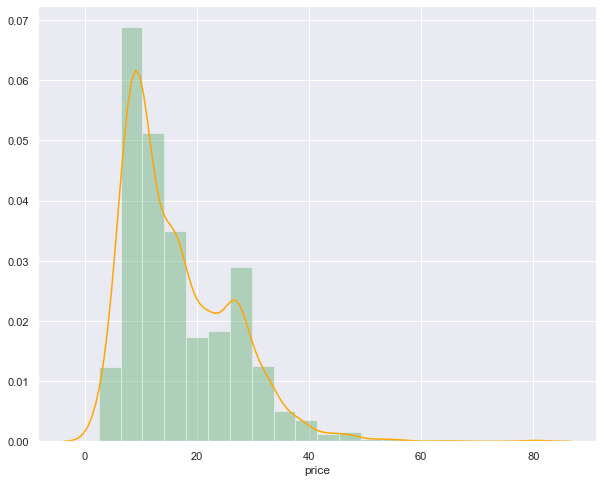

In [13]:
plt.figure(figsize=(10, 8))
sns.distplot(df['price'], color='g', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

<font color='DARKGREEN'>__Show the distribution of categorical features__</font>

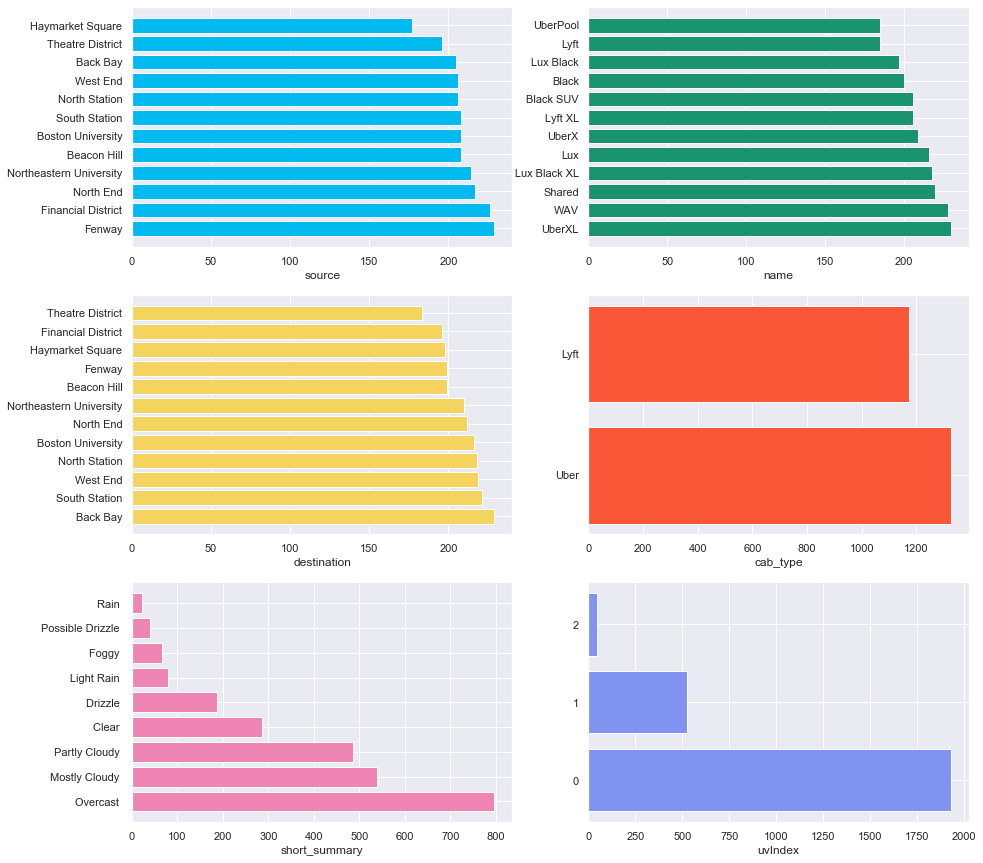

In [14]:
from itertools import product

df_cat = df.select_dtypes(include = ['object', 'category'])
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
columns = df_cat.columns[[0, 3, 1, 2, 4, 5]]
position = list(product([0, 1, 2], [0, 1]))
color = ['#01baef', '#1a936f', '#f4d35e', '#f95738', '#ee85b5', '#8093f1']

for p, c, n in zip(position, columns, color):
    plt.sca(axes[p[0], p[1]])
    x_axis = df[c].unique()
    y_axis = df[c].value_counts()
    plt.barh(x_axis, y_axis, color=n)
    plt.xlabel(c)

<font color='DARKGREEN'>__Redefine and reclassify data type, range and category.__</font>

In [15]:

def bodytemp(f):
    if f >= 40:
        x = 2
    if f >= 30:
        x = 1
    else:
        x = 0
    return x

def cloud(cover):
    if cover >= 0.9:
        x = 1
    else:
        x = 0
    return x


def day_group(day):
    if day >= 20:
        x = 2
    elif day >= 10:
        x = 1
    else:
        x = 0
    return x

def moon(phase):
    if phase >= 0.5:
        x = 1
    else:
        x = 0
    return x

In [16]:
df['apparentTemperature'] = df['apparentTemperature'].map(bodytemp)
df['cloudCover'] = df['cloudCover'].map(cloud)
df['day'] = df['day'].map(day_group)
df['moonPhase'] = df['moonPhase'].map(moon)

df[['apparentTemperature', 'cloudCover', 'day', 'moonPhase'
    ]] = df[['apparentTemperature', 'cloudCover', 'day',
             'moonPhase']].astype('category')

df['apparentTemperature'] = pd.Categorical(df['apparentTemperature'],
                                           categories=[0, 1, 2],
                                           ordered=True)
df['cloudCover'] = pd.Categorical(df['cloudCover'],
                                  categories=[0, 1],
                                  ordered=True)
df['day'] = pd.Categorical(df['day'].astype('category'),
                           categories=[0, 1, 2],
                           ordered=True)
df['moonPhase'] = pd.Categorical(df['moonPhase'].astype('category'),
                                 categories=[0, 1],
                                 ordered=True)

<font color='DARKGREEN'>__Show the distribution of continuous features__</font>

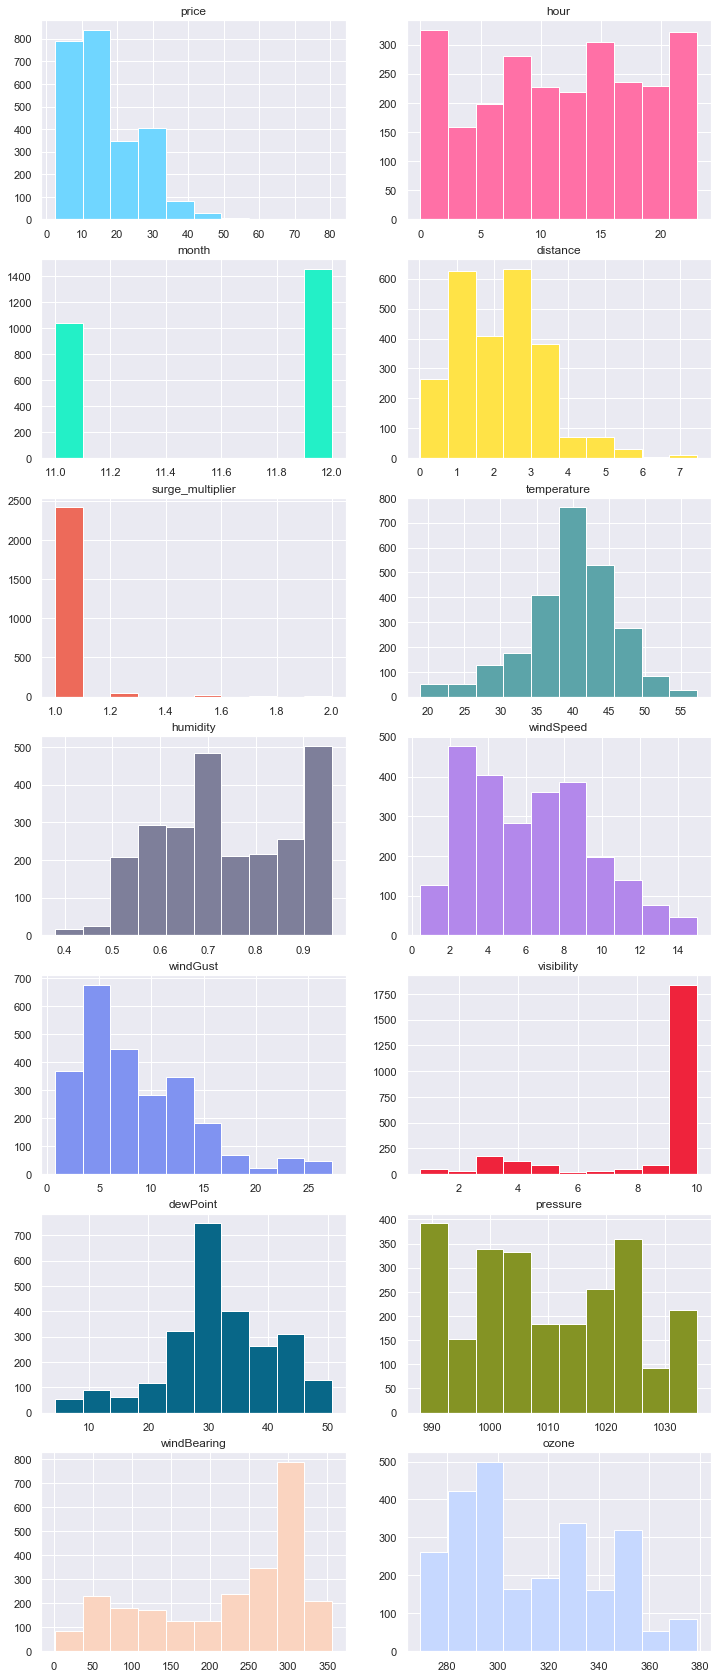

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 30))
df_num = df.select_dtypes(include = ['float64', 'int64']) 
columns = df_num
position = list(product([0, 1, 2, 3, 4, 5, 6 ,7], [0, 1]))
color = ['#70d6ff', '#ff70a6', '#23f0c7', '#ffe347', '#ed6a5a', '#5ca4a9', '#7e7f9a', '#b388eb', '#8093f1',
        '#ef233c', '#086788', '#849324', '#fad4c0', '#c6d8ff', '#009ffd', '#ab8476', '#cae7b9', '#fece86']

for p, c, n in zip(position, columns, color):
    plt.sca(axes[p[0], p[1]])
    plt.hist(df[c], color=n)
    plt.title(c)

<font color='DARKGREEN'>__Correlation between features and price__</font>

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['price'][1:]
df_num_corr

hour               -0.019042
month              -0.027848
distance            0.328675
surge_multiplier    0.212647
temperature         0.024994
humidity            0.021186
windSpeed           0.021115
windGust            0.007862
visibility         -0.037093
dewPoint            0.034951
pressure           -0.013303
windBearing        -0.008954
ozone              -0.024394
Name: price, dtype: float64

<font color='DARKGREEN'>__Correlation between features and features__</font>

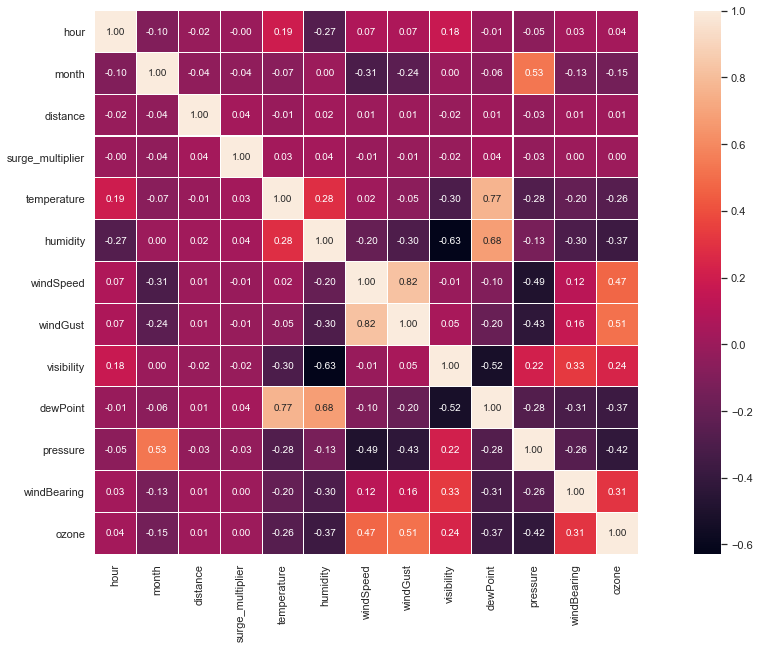

In [19]:
corr = df.drop('price', axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, vmax=1.0, linewidths=0.1, annot=True, 
                 annot_kws={'size':10}, square=True, fmt=".2f")
plt.show()

<font color='DARKGREEN'>__Remove high correlation features to avoid collinearity issue.__</font>

In [20]:
df1 = df.copy()
df1 = df1.drop(['temperature', 'windGust', 'dewPoint'], axis=1)

<font color='DARKGREEN'>__Transform features belong to category type and object type to dummy variables.__</font>

In [21]:
df1 = pd.get_dummies(df, columns=['source', 'destination', 'cab_type', 'name', 
                            'short_summary'], drop_first=True)

<font color='DARKGREEN'>__Scaling Data__  
After reorganizing whole dataset, we use MinMaxScaler to scale dataset and split it for train data size is 80% and test data size is 20%.</font>

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
X = df1.drop(['price'],axis=1)
y = df1['price']

In [24]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Basic Regression Model

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### KNN Regressor

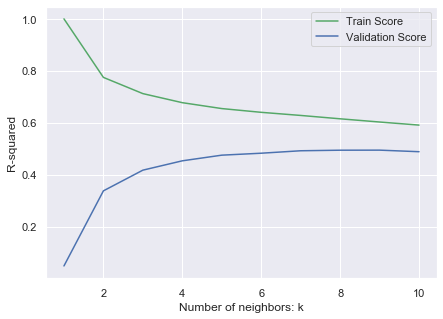

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.602770,0.494490,{'n_neighbors': 9}
2,0.615144,0.494243,{'n_neighbors': 8}
3,0.628107,0.492094,{'n_neighbors': 7}
4,0.590905,0.488447,{'n_neighbors': 10}
5,0.640094,0.482658,{'n_neighbors': 6}
6,0.654550,0.475145,{'n_neighbors': 5}
7,0.677249,0.453382,{'n_neighbors': 4}
8,0.712152,0.417421,{'n_neighbors': 3}
9,0.774578,0.337757,{'n_neighbors': 2}


In [25]:
# view the complete results
param_grid = {'n_neighbors': list(range(1, 11))}
knn_reg = GridSearchCV(KNeighborsRegressor(),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
knn_reg.fit(X_train, y_train)
knn_result = pd.DataFrame(knn_reg.cv_results_)
knn_result.index = knn_result.rank_test_score


# plot the mean cross-validation scores
x_axis = range(1,11)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, knn_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('Number of neighbors: k')
plt.ylabel('R-squared')
plt.show()

knn_result[['mean_train_score', 'mean_test_score', 'params']].sort_index()

In [26]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    knn_reg.best_params_, knn_reg.best_score_))

Best Parameter: {'n_neighbors': 9}
Average cross-validation score: 0.4945


In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
print('R-squared score on Training set: {:.4f}'
     .format(knn_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(knn_reg.score(X_test, y_test)))
y_pred = knn_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.6206
R-squared score Test set: 0.5262
Mean square error: 40.10803086419753
Mean absolute error: 4.478777777777777


### Linear Regression Using Normal Equation

In [29]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Training Score: {:.4f}'.format(lreg.score(X_train, y_train)))
score = cross_val_score(lreg, X_train, y_train, cv = 5).mean()
print("Average cross-validation score: {:.4f}".format(score.mean()))

Training Score: 0.8346
Average cross-validation score: 0.8193


In [30]:
print('R-squared score on Training set: {:.4f}'
     .format(lreg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(lreg.score(X_test, y_test)))
y_pred = lreg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8346
R-squared score Test set: 0.8164
Mean square error: 15.543008067656128
Mean absolute error: 2.3402415684830786


### Ridge

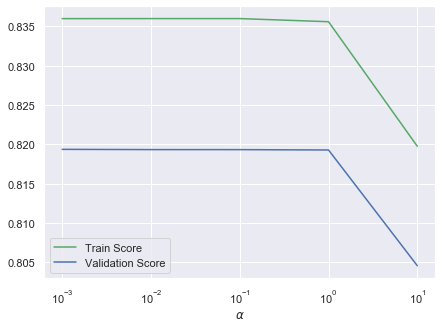

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.835982,0.819362,{'alpha': 0.1}
2,0.835987,0.819330,{'alpha': 0.01}
3,0.835987,0.819326,{'alpha': 0.001}
4,0.835590,0.819282,{'alpha': 1}
5,0.819753,0.804571,{'alpha': 10}


In [31]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_reg = GridSearchCV(Ridge(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ridge_reg.fit(X_train, y_train)
ridge_result = pd.DataFrame(ridge_reg.cv_results_)
ridge_result.index = ridge_result.rank_test_score
ridge_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(7, 5))
plt.plot(x_range, ridge_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

ridge_result[['mean_train_score', 'mean_test_score', 'params']]

In [32]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ridge_reg.best_params_, ridge_reg.best_score_))

Best Parameter: {'alpha': 0.1}
Average cross-validation score: 0.8194


In [33]:
print('R-squared score on Training set: {:.4f}'
     .format(ridge_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(ridge_reg.score(X_test, y_test)))
y_pred = ridge_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8346
R-squared score Test set: 0.8165
Mean square error: 15.531025425671563
Mean absolute error: 2.3388877332605387


### Lasso

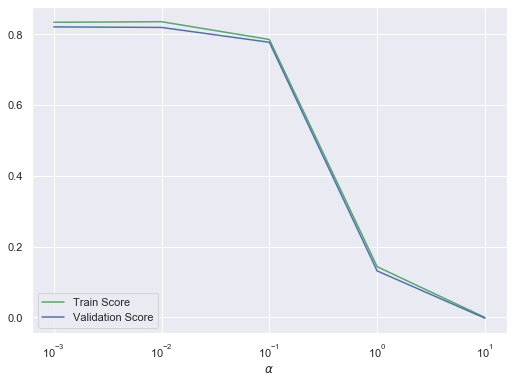

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.834267,0.821256,"{'alpha': 0.01, 'max_iter': 10000}"
2,0.835934,0.819722,"{'alpha': 0.001, 'max_iter': 10000}"
3,0.785766,0.777765,"{'alpha': 0.1, 'max_iter': 10000}"
4,0.143496,0.131591,"{'alpha': 1, 'max_iter': 10000}"
5,0.000000,-0.002140,"{'alpha': 10, 'max_iter': 10000}"


In [34]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[10000]}
lasso_reg = GridSearchCV(Lasso(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
lasso_reg.fit(X_train, y_train)
lasso_result = pd.DataFrame(lasso_reg.cv_results_)
lasso_result.index = lasso_result.rank_test_score
lasso_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(8.5, 6))
plt.plot(x_range, lasso_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

lasso_result[['mean_train_score', 'mean_test_score', 'params']]

In [35]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    lasso_reg.best_params_, lasso_reg.best_score_))

Best Parameter: {'alpha': 0.01, 'max_iter': 10000}
Average cross-validation score: 0.8213


In [36]:
print('R-squared score on Training set: {:.4f}'
     .format(lasso_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(lasso_reg.score(X_test, y_test)))
y_pred = lasso_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8330
R-squared score Test set: 0.8173
Mean square error: 15.462742761063069
Mean absolute error: 2.299622555712135


### Polynomial Regression

In [57]:
for n in range(1,2):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5)
    print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.8133594  0.88609949 0.79463928 0.76802541 0.83450422]


In [38]:
best_score = 0
for n in range(1,2):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    score = cross_val_score(lreg, X_train_poly, y_train, cv = 5).mean()
    if score > best_score:
            best_score = score
            best_parameters = {'degree': n}

print("Best parameters: {}".format(best_parameters))
print("Average cross-validation score: {:.4f}".format(best_score))

Best parameters: {'degree': 1}
Average cross-validation score: 0.8193


In [39]:
print('R-squared score on Training set: {:.4f}'
     .format(lreg.score(X_train_poly, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(lreg.score(X_test_poly, y_test)))
y_pred = lreg.predict(X_test_poly)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8346
R-squared score Test set: 0.8164
Mean square error: 15.543008067656134
Mean absolute error: 2.340241568483078


### SVM Simple Regressor

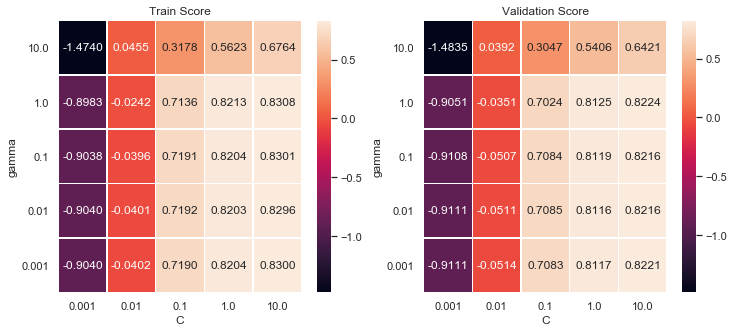

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.830815,0.822434,"{'C': 10, 'epsilon': 1}"
2,0.829983,0.822051,"{'C': 10, 'epsilon': 0.001}"
3,0.829594,0.821591,"{'C': 10, 'epsilon': 0.01}"
4,0.830091,0.821591,"{'C': 10, 'epsilon': 0.1}"
5,0.821311,0.812458,"{'C': 1, 'epsilon': 1}"
6,0.820442,0.811892,"{'C': 1, 'epsilon': 0.1}"
7,0.820365,0.811703,"{'C': 1, 'epsilon': 0.001}"
8,0.820300,0.811557,"{'C': 1, 'epsilon': 0.01}"
9,0.719192,0.708549,"{'C': 0.1, 'epsilon': 0.01}"


In [40]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}
linsvm_reg = GridSearchCV(LinearSVR(random_state=0),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
linsvm_reg.fit(X_train, y_train)
linsvm_result = pd.DataFrame(linsvm_reg.cv_results_)
linsvm_result.index = linsvm_result.rank_test_score
linsvm_result.sort_index(inplace=True)

results = pd.DataFrame(linsvm_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['epsilon'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['epsilon'])

# plot the mean cross-validation scores
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Train Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

linsvm_result[['mean_train_score', 'mean_test_score', 'params']]

In [41]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    linsvm_reg.best_params_, linsvm_reg.best_score_))

Best Parameter: {'C': 10, 'epsilon': 1}
Average cross-validation score: 0.8224


In [42]:
print('R-squared score on Training set: {:.4f}'
     .format(linsvm_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(linsvm_reg.score(X_test, y_test)))
y_pred = linsvm_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8301
R-squared score Test set: 0.8214
Mean square error: 15.120856947223679
Mean absolute error: 2.2102141080724143


### SVM With Kernel Regressor

#### Linear

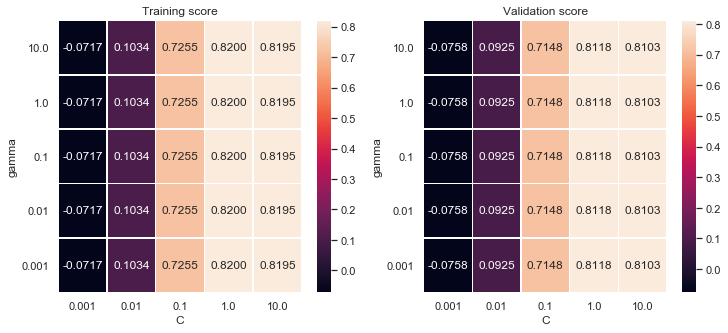

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.819988,0.811824,"{'C': 1, 'gamma': 10}"
1,0.819988,0.811824,"{'C': 1, 'gamma': 1}"
1,0.819988,0.811824,"{'C': 1, 'gamma': 0.1}"
1,0.819988,0.811824,"{'C': 1, 'gamma': 0.01}"
1,0.819988,0.811824,"{'C': 1, 'gamma': 0.001}"
6,0.819497,0.810328,"{'C': 10, 'gamma': 10}"
6,0.819497,0.810328,"{'C': 10, 'gamma': 0.1}"
6,0.819497,0.810328,"{'C': 10, 'gamma': 0.01}"
6,0.819497,0.810328,"{'C': 10, 'gamma': 0.001}"


In [43]:
# view the complete results
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svclinear_reg = GridSearchCV(SVR(kernel='linear', max_iter=2e3),
                             param_grid,
                             cv=5,
                             return_train_score=True,
                             scoring='r2')
svclinear_reg.fit(X_train, y_train)
svclinear_result = pd.DataFrame(svclinear_reg.cv_results_)
svclinear_result.index = svclinear_result.rank_test_score
svclinear_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svclinear_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svclinear_result[['mean_train_score', 'mean_test_score', 'params']]

In [44]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svclinear_reg.best_params_, svclinear_reg.best_score_))

Best Parameter: {'C': 1, 'gamma': 0.001}
Average cross-validation score: 0.8118


In [45]:
print('R-squared score on Training set: {:.4f}'
     .format(svclinear_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svclinear_reg.score(X_test, y_test)))
y_pred = svclinear_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8210
R-squared score Test set: 0.8163
Mean square error: 15.554992966867186
Mean absolute error: 2.184305777740294


#### RBF

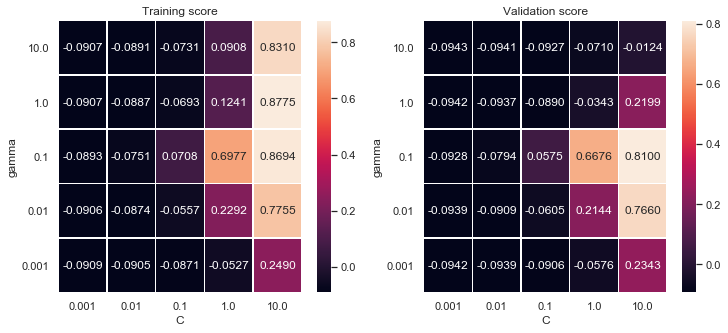

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.869409,0.810006,"{'C': 10, 'gamma': 0.1}"
2,0.775547,0.765953,"{'C': 10, 'gamma': 0.01}"
3,0.697653,0.667569,"{'C': 1, 'gamma': 0.1}"
4,0.249020,0.234332,"{'C': 10, 'gamma': 0.001}"
5,0.877491,0.219864,"{'C': 10, 'gamma': 1}"
6,0.229246,0.214401,"{'C': 1, 'gamma': 0.01}"
7,0.070757,0.057549,"{'C': 0.1, 'gamma': 0.1}"
8,0.831046,-0.012448,"{'C': 10, 'gamma': 10}"
9,0.124065,-0.034325,"{'C': 1, 'gamma': 1}"


In [46]:
# view the complete results
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
svcrbf_reg = GridSearchCV(SVR(kernel='rbf'),
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring='r2')
svcrbf_reg.fit(X_train, y_train)
svcrbf_result = pd.DataFrame(svcrbf_reg.cv_results_)
svcrbf_result.index = svcrbf_result.rank_test_score
svcrbf_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svcrbf_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svcrbf_result[['mean_train_score', 'mean_test_score', 'params']]

In [47]:
print('Best Parameter: {0}\nAverage cross-vlidation score: {1:.4f}'.format(
    svcrbf_reg.best_params_, svcrbf_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-vlidation score: 0.8100


In [48]:
print('R-squared score on Training set: {:.4f}'
     .format(svcrbf_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svcrbf_reg.score(X_test, y_test)))
y_pred = svcrbf_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8686
R-squared score Test set: 0.8191
Mean square error: 15.310672940453077
Mean absolute error: 2.152704720606905


#### Polynomial

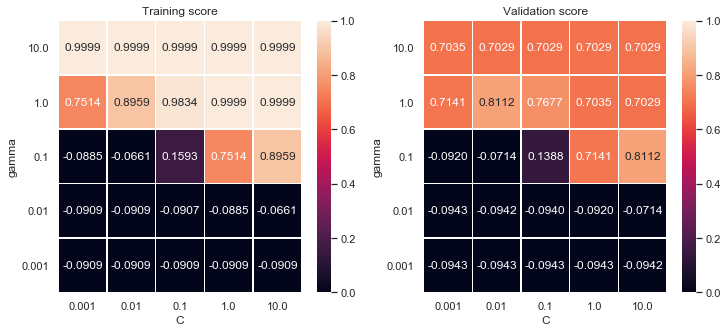

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.895878,0.811177,"{'C': 10, 'gamma': 0.1}"
2,0.895878,0.811176,"{'C': 0.01, 'gamma': 1}"
3,0.983405,0.767716,"{'C': 0.1, 'gamma': 1}"
4,0.751414,0.714122,"{'C': 0.001, 'gamma': 1}"
5,0.751414,0.714122,"{'C': 1, 'gamma': 0.1}"
6,0.999887,0.703453,"{'C': 0.001, 'gamma': 10}"
7,0.999887,0.703453,"{'C': 1, 'gamma': 1}"
8,0.999888,0.702926,"{'C': 10, 'gamma': 10}"
9,0.999888,0.702926,"{'C': 0.1, 'gamma': 10}"


In [49]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svrpoly_reg = GridSearchCV(SVR(kernel = 'poly'),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
svrpoly_reg.fit(X_train, y_train)
svrpoly_result = pd.DataFrame(svrpoly_reg.cv_results_)
svrpoly_result.index = svrpoly_result.rank_test_score
svrpoly_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svrpoly_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, vmax=1, vmin=0,annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, vmax=1, vmin=0, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svrpoly_result[['mean_train_score', 'mean_test_score', 'params']]

In [50]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svrpoly_reg.best_params_, svrpoly_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-validation score: 0.8112


In [51]:
print('R-squared score on Training set: {:.4f}'
     .format(svrpoly_reg.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svrpoly_reg.score(X_test, y_test)))
y_pred = svrpoly_reg.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8935
R-squared score Test set: 0.8127
Mean square error: 15.854390017464414
Mean absolute error: 2.370472131956204


### Decision Tree Regression

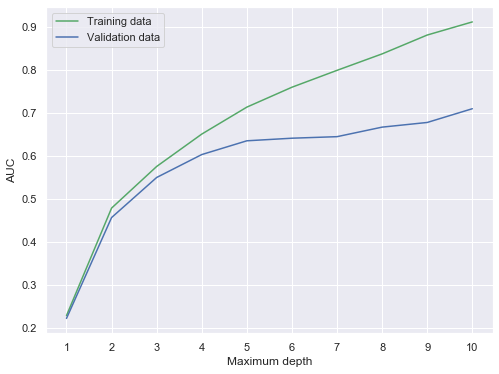

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.912378,0.710465,{'max_depth': 10}
2,0.881873,0.678505,{'max_depth': 9}
3,0.838028,0.667653,{'max_depth': 8}
4,0.799747,0.645474,{'max_depth': 7}
5,0.760486,0.641888,{'max_depth': 6}
6,0.714210,0.635863,{'max_depth': 5}
7,0.651480,0.603854,{'max_depth': 4}
8,0.576179,0.550560,{'max_depth': 3}
9,0.479339,0.457344,{'max_depth': 2}


In [52]:
depth = list(range(1, 11))
param_grid = {'max_depth': depth}
dtree = DecisionTreeRegressor(random_state=0)
dtree_clf = GridSearchCV(dtree,
                         param_grid,
                         n_jobs=-1,
                         scoring='r2',
                         return_train_score=True)
dtree_clf.fit(X_train, y_train)

# view the complete results
results = pd.DataFrame(dtree_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = depth

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training data', c='g')
plt.plot(x_axis, test_scores, label='Validation data', c='b')
plt.xlabel('Maximum depth')
plt.ylabel('AUC')
plt.xticks(range(1, len(depth) + 1), depth)
plt.legend()
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [53]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    dtree_clf.best_params_, dtree_clf.best_score_))

Best Parameter: {'max_depth': 10}
Average cross-validation score: 0.7105


In [54]:
print('R-squared score on Training set: {:.4f}'
     .format(dtree_clf.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(dtree_clf.score(X_test, y_test)))
y_pred = dtree_clf.predict(X_test)
print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.9119
R-squared score Test set: 0.6377
Mean square error: 30.67167983815058
Mean absolute error: 2.809618616761477


## Prediction Based On Basic Regression Model

In [55]:
svr_poly = SVR(C=10, gamma=0.1, kernel='poly')
svr_poly.fit(X_train, y_train)
svr_poly.score(X_test, y_test)
print('Test score(R-square): {:.4f}'.format(svr_poly.score(X_test, y_test)))

Test score(R-square): 0.8127


In [56]:
from sklearn.metrics import mean_squared_error
y_pred =  svr_poly.predict(X_test)
mean_squared_error(y_test, y_pred)

15.854390017464414

<font color='DARKGREEN'>__Summary__  
The best regression model is "Support Vector Regression (SVR) using polynomial kernel" to predict price value as it has highest average cross-validation score, R-squared in this task, is 0.8305. The test score and mean squared error for prediction is 0.8258 and 14.2253 respectively. In other words, the SVR with polynomial kernel is able to explain almost 83% of the data. According to the result, it seems that SVR with polynomial kernel is a qualified regrssion model for this dataset.</font>

## Advanced Regression Model

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

### Bagging

#### Ridge with Bagging

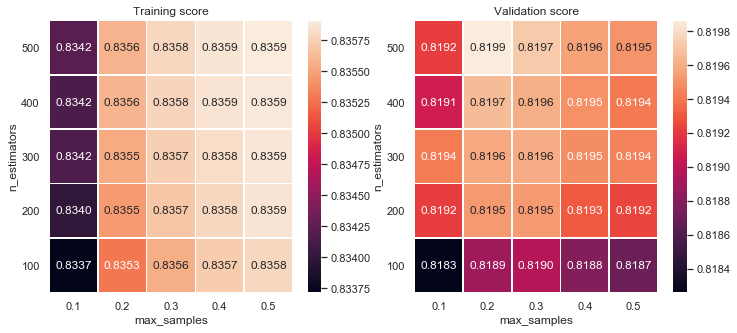

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.835586,0.819861,"{'max_samples': 0.2, 'n_estimators': 500}"
2,0.835794,0.819718,"{'max_samples': 0.3, 'n_estimators': 500}"
3,0.835593,0.819657,"{'max_samples': 0.2, 'n_estimators': 400}"
4,0.835775,0.819608,"{'max_samples': 0.3, 'n_estimators': 400}"
5,0.835740,0.819603,"{'max_samples': 0.3, 'n_estimators': 300}"
6,0.835547,0.819585,"{'max_samples': 0.2, 'n_estimators': 300}"
7,0.835870,0.819561,"{'max_samples': 0.4, 'n_estimators': 500}"
8,0.835686,0.819530,"{'max_samples': 0.3, 'n_estimators': 200}"
9,0.835462,0.819525,"{'max_samples': 0.2, 'n_estimators': 200}"


In [15]:
ridge_reg = Ridge(alpha=0.1, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[0.1,0.2,0.3,0.4,0.5]}
bag_ridge_reg = BaggingRegressor(ridge_reg, bootstrap=True, n_jobs=-1,random_state=0)
bag_ridge_reg_grid = GridSearchCV(bag_ridge_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
bag_ridge_reg_grid.fit(X_train, y_train)
bag_ridge_reg_grid_result = pd.DataFrame(bag_ridge_reg_grid.cv_results_)
bag_ridge_reg_grid_result.index = bag_ridge_reg_grid_result.rank_test_score
bag_ridge_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(bag_ridge_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['max_samples'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['max_samples'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

bag_ridge_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [16]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    bag_ridge_reg_grid.best_params_, bag_ridge_reg_grid.best_score_))

Best Parameter: {'max_samples': 0.2, 'n_estimators': 500}
Average cross-validation score: 0.8199


In [17]:
print('R-squared score on Training set: {:.4f}'
     .format(bag_ridge_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(bag_ridge_reg_grid.score(X_test, y_test)))
y_pred = bag_ridge_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8344
R-squared score Test set: 0.8168
Mean square error: 15.5072
Mean absolute error: 2.3350


<font color='green'>__With Bagging method using Ridge regression, the R-squared score on test set is 0.8168 and Mean square error is 15.51.__

#### Lasso with Bagging

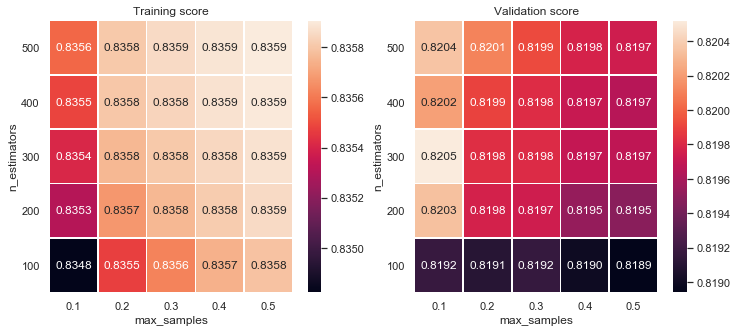

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.835411,0.820521,"{'max_samples': 0.1, 'n_estimators': 300}"
2,0.835559,0.820356,"{'max_samples': 0.1, 'n_estimators': 500}"
3,0.835310,0.820347,"{'max_samples': 0.1, 'n_estimators': 200}"
4,0.835486,0.820212,"{'max_samples': 0.1, 'n_estimators': 400}"
5,0.835806,0.820108,"{'max_samples': 0.2, 'n_estimators': 500}"
6,0.835860,0.819926,"{'max_samples': 0.3, 'n_estimators': 500}"
7,0.835805,0.819900,"{'max_samples': 0.2, 'n_estimators': 400}"
8,0.835759,0.819828,"{'max_samples': 0.2, 'n_estimators': 300}"
9,0.835843,0.819821,"{'max_samples': 0.3, 'n_estimators': 400}"


In [18]:
lasso_reg = Lasso(alpha=0.001, max_iter=10000, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[0.1,0.2,0.3,0.4,0.5]}
bag_lasso_reg = BaggingRegressor(lasso_reg, bootstrap=True, n_jobs=-1,random_state=0)
bag_lasso_reg_grid = GridSearchCV(bag_lasso_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
bag_lasso_reg_grid.fit(X_train, y_train)
bag_lasso_reg_grid_result = pd.DataFrame(bag_lasso_reg_grid.cv_results_)
bag_lasso_reg_grid_result.index = bag_lasso_reg_grid_result.rank_test_score
bag_lasso_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(bag_lasso_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['max_samples'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['max_samples'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

bag_lasso_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [19]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    bag_lasso_reg_grid.best_params_, bag_lasso_reg_grid.best_score_))

Best Parameter: {'max_samples': 0.1, 'n_estimators': 300}
Average cross-validation score: 0.8205


In [20]:
print('R-squared score on Training set: {:.4f}'
     .format(bag_lasso_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(bag_lasso_reg_grid.score(X_test, y_test)))
y_pred = bag_lasso_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8341
R-squared score Test set: 0.8154
Mean square error: 15.6289
Mean absolute error: 2.3387


<font color='DARKGREEN'>__With Bagging method using Lasso regression, the R-squared score on test set is 0.8154 and Mean square error is 15.63.__

### Pasting

#### Ridge with Pasting

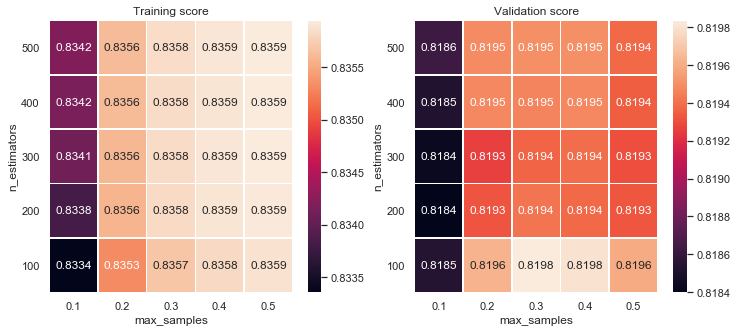

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.835688,0.819835,"{'max_samples': 0.3, 'n_estimators': 100}"
2,0.835813,0.819799,"{'max_samples': 0.4, 'n_estimators': 100}"
3,0.835326,0.819622,"{'max_samples': 0.2, 'n_estimators': 100}"
4,0.835877,0.819597,"{'max_samples': 0.5, 'n_estimators': 100}"
5,0.835910,0.819500,"{'max_samples': 0.4, 'n_estimators': 500}"
6,0.835850,0.819499,"{'max_samples': 0.3, 'n_estimators': 500}"
7,0.835629,0.819490,"{'max_samples': 0.2, 'n_estimators': 500}"
8,0.835610,0.819479,"{'max_samples': 0.2, 'n_estimators': 400}"
9,0.835903,0.819479,"{'max_samples': 0.4, 'n_estimators': 400}"


In [21]:
ridge_reg = Ridge(alpha=0.1, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[0.1,0.2,0.3,0.4,0.5]}
past_ridge_reg = BaggingRegressor(ridge_reg, bootstrap=False, n_jobs=-1,random_state=0)
past_ridge_reg_grid = GridSearchCV(past_ridge_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
past_ridge_reg_grid.fit(X_train, y_train)
past_ridge_reg_grid_result = pd.DataFrame(past_ridge_reg_grid.cv_results_)
past_ridge_reg_grid_result.index = past_ridge_reg_grid_result.rank_test_score
past_ridge_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(past_ridge_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['max_samples'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['max_samples'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

past_ridge_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [22]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    past_ridge_reg_grid.best_params_, past_ridge_reg_grid.best_score_))

Best Parameter: {'max_samples': 0.3, 'n_estimators': 100}
Average cross-validation score: 0.8198


In [23]:
print('R-squared score on Training set: {:.4f}'
     .format(past_ridge_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(past_ridge_reg_grid.score(X_test, y_test)))
y_pred = past_ridge_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8344
R-squared score Test set: 0.8173
Mean square error: 15.4648
Mean absolute error: 2.3318


<font color='DARKGREEN'>__With Pasting method using Ridge regression, the R-squared score on test set is 0.8173 and Mean square error is 15.47, which are a litte better than Bagging method.__

#### Lasso with Bagging

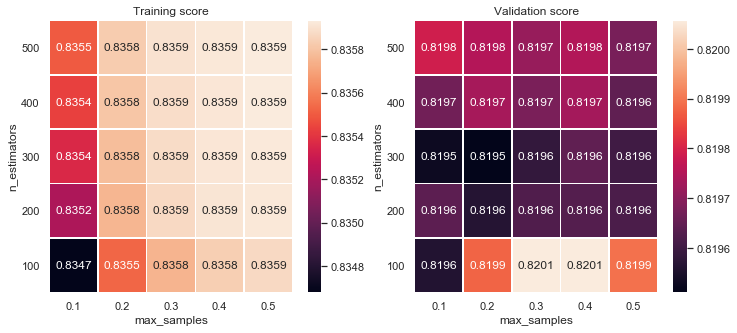

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.835837,0.820057,"{'max_samples': 0.4, 'n_estimators': 100}"
2,0.835754,0.820056,"{'max_samples': 0.3, 'n_estimators': 100}"
3,0.835870,0.819893,"{'max_samples': 0.5, 'n_estimators': 100}"
4,0.835530,0.819878,"{'max_samples': 0.2, 'n_estimators': 100}"
5,0.835498,0.819791,"{'max_samples': 0.1, 'n_estimators': 500}"
6,0.835830,0.819753,"{'max_samples': 0.2, 'n_estimators': 500}"
7,0.835922,0.819751,"{'max_samples': 0.4, 'n_estimators': 500}"
8,0.835808,0.819736,"{'max_samples': 0.2, 'n_estimators': 400}"
9,0.835916,0.819733,"{'max_samples': 0.4, 'n_estimators': 400}"


In [24]:
lasso_reg = Lasso(alpha=0.001, max_iter=10000, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[0.1,0.2,0.3,0.4,0.5]}
past_lasso_reg = BaggingRegressor(lasso_reg, bootstrap=False, n_jobs=-1,random_state=0)
past_lasso_reg_grid = GridSearchCV(past_lasso_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
past_lasso_reg_grid.fit(X_train, y_train)
past_lasso_reg_grid_result = pd.DataFrame(past_lasso_reg_grid.cv_results_)
past_lasso_reg_grid_result.index = past_lasso_reg_grid_result.rank_test_score
past_lasso_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(past_lasso_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['max_samples'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['max_samples'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

past_lasso_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [25]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    past_lasso_reg_grid.best_params_, past_lasso_reg_grid.best_score_))

Best Parameter: {'max_samples': 0.4, 'n_estimators': 100}
Average cross-validation score: 0.8201


In [26]:
print('R-squared score on Training set: {:.4f}'
     .format(past_lasso_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(past_lasso_reg_grid.score(X_test, y_test)))
y_pred = past_lasso_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8344
R-squared score Test set: 0.8177
Mean square error: 15.4305
Mean absolute error: 2.3247


<font color='DARKGREEN'>__With Bagging method using Ridge regression, the R-squared score on test set is 0.8177 and Mean square error is 15.43, which are a litte better than Bagging method.__

### AdaBoost Boosting

#### LinearSVR with Adaboost Boosting

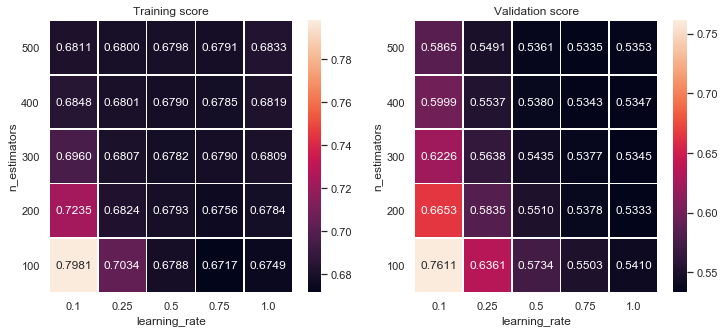

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.798097,0.761053,"{'learning_rate': 0.1, 'n_estimators': 100}"
2,0.723516,0.665291,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,0.703359,0.636079,"{'learning_rate': 0.25, 'n_estimators': 100}"
4,0.695968,0.622594,"{'learning_rate': 0.1, 'n_estimators': 300}"
5,0.684796,0.599865,"{'learning_rate': 0.1, 'n_estimators': 400}"
6,0.681136,0.586527,"{'learning_rate': 0.1, 'n_estimators': 500}"
7,0.682386,0.583455,"{'learning_rate': 0.25, 'n_estimators': 200}"
8,0.678786,0.573446,"{'learning_rate': 0.5, 'n_estimators': 100}"
9,0.680699,0.563761,"{'learning_rate': 0.25, 'n_estimators': 300}"


In [27]:
linsvr = LinearSVR(C=10, epsilon=1, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'learning_rate':[0.1, 0.25, 0.5, 0.75, 1]}
ada_linsvr_reg = AdaBoostRegressor(linsvr, random_state=0)
ada_linsvr_reg_grid = GridSearchCV(ada_linsvr_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ada_linsvr_reg_grid.fit(X_train, y_train)
ada_linsvr_reg_grid_result = pd.DataFrame(ada_linsvr_reg_grid.cv_results_)
ada_linsvr_reg_grid_result.index = ada_linsvr_reg_grid_result.rank_test_score
ada_linsvr_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(ada_linsvr_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['learning_rate'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['learning_rate'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

ada_linsvr_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [28]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ada_linsvr_reg_grid.best_params_, ada_linsvr_reg_grid.best_score_))

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 100}
Average cross-validation score: 0.7611


In [29]:
print('R-squared score on Training set: {:.4f}'
     .format(ada_linsvr_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(ada_linsvr_reg_grid.score(X_test, y_test)))
y_pred = ada_linsvr_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7995
R-squared score Test set: 0.7553
Mean square error: 20.7144
Mean absolute error: 3.0222


<font color='DARKGREEN'>__With AdaBoost Boosting method using LinearSVR regression, the R-squared score on test set is 0.7553 and Mean square error is 20.71, which are more poor than Bagging method and Pasting method.__

#### Decision Tree Regressor with Adaboost Boosting

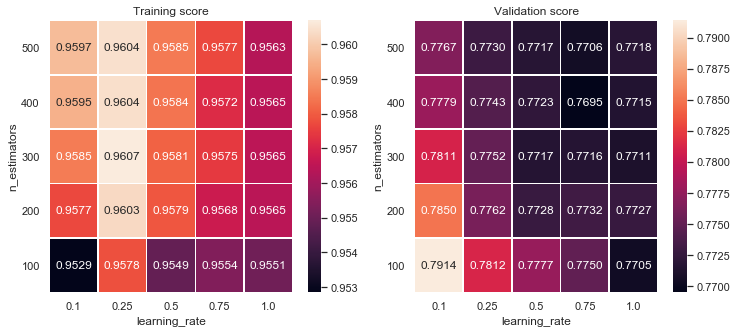

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.952852,0.791373,"{'learning_rate': 0.1, 'n_estimators': 100}"
2,0.957701,0.785029,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,0.957829,0.781236,"{'learning_rate': 0.25, 'n_estimators': 100}"
4,0.958544,0.781072,"{'learning_rate': 0.1, 'n_estimators': 300}"
5,0.959519,0.777908,"{'learning_rate': 0.1, 'n_estimators': 400}"
6,0.954878,0.777726,"{'learning_rate': 0.5, 'n_estimators': 100}"
7,0.959710,0.776719,"{'learning_rate': 0.1, 'n_estimators': 500}"
8,0.960314,0.776242,"{'learning_rate': 0.25, 'n_estimators': 200}"
9,0.960688,0.775188,"{'learning_rate': 0.25, 'n_estimators': 300}"


In [30]:
dtree = DecisionTreeRegressor(max_depth= 10, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500],'learning_rate':[0.1, 0.25, 0.5, 0.75, 1]}
ada_dtree_reg = AdaBoostRegressor(dtree, random_state=0)
ada_dtree_reg_grid = GridSearchCV(ada_dtree_reg,
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ada_dtree_reg_grid.fit(X_train, y_train)
ada_dtree_reg_grid_result = pd.DataFrame(ada_dtree_reg_grid.cv_results_)
ada_dtree_reg_grid_result.index = ada_dtree_reg_grid_result.rank_test_score
ada_dtree_reg_grid_result.sort_index(inplace=True)


results = pd.DataFrame(ada_dtree_reg_grid.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['n_estimators'][::-1],
                           columns=param_grid['learning_rate'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['n_estimators'][::-1],
                            columns=param_grid['learning_rate'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.yticks(rotation=0)
plt.show()

ada_dtree_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

In [31]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ada_dtree_reg_grid.best_params_, ada_dtree_reg_grid.best_score_))

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 100}
Average cross-validation score: 0.7914


In [32]:
print('R-squared score on Training set: {:.4f}'
     .format(ada_dtree_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(ada_dtree_reg_grid.score(X_test, y_test)))
y_pred = ada_dtree_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.9476
R-squared score Test set: 0.7826
Mean square error: 18.4000
Mean absolute error: 2.4921


<font color='DARKGREEN'>__With AdaBoost Boosting method using Decisioin Tree regression, the R-squared score on test set is 0.7826 and Mean square error is 18.4, which are better than LinearSVR method above but also poor than Bagging method and Pasting method.__

### Gradient Boosting

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [2, 3, 4, 5]
}
grbt_reg = GradientBoostingRegressor(random_state=0)
gbrt_reg_grid = GridSearchCV(grbt_reg,
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring='r2')
gbrt_reg_grid.fit(X_train, y_train)
gbrt_reg_grid_result = pd.DataFrame(gbrt_reg_grid.cv_results_)
gbrt_reg_grid_result.index = gbrt_reg_grid_result.rank_test_score
gbrt_reg_grid_result.sort_index(inplace=True)
gbrt_reg_grid_result[['mean_train_score', 'mean_test_score', 'params']]

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.903074,0.833665,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
2,0.892328,0.832673,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
3,0.926619,0.825368,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
4,0.875519,0.825130,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
5,0.944620,0.823701,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
...,...,...,...
60,0.648536,0.586580,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
61,0.599767,0.557141,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est..."
62,0.586014,0.555297,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."


In [34]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    gbrt_reg_grid.best_params_, gbrt_reg_grid.best_score_))

Best Parameter: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400}
Average cross-validation score: 0.8337


In [35]:
print('R-squared score on Training set: {:.4f}'
     .format(gbrt_reg_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(gbrt_reg_grid.score(X_test, y_test)))
y_pred = gbrt_reg_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8974
R-squared score Test set: 0.8294
Mean square error: 14.4455
Mean absolute error: 2.1656


<font color='DARKGREEN'>__With Gradient Boosting regression model, the R-squared score on test set is 0.8294 and Mean square error is 14.45, which are better than all the models above.__

### PCA

In [36]:
pca = PCA(0.95)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
X_train_PCA.shape

(2000, 42)

<font color='green'> __After applying PCA, the dimension of our dataset is reduced from 61 to 42 features with maintaining 95% of explanation of variance.__

#### KNN Regressor with PCA

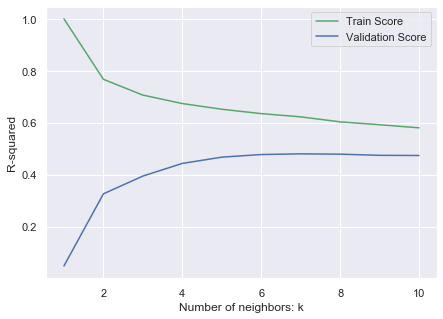

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.622790,0.480398,{'n_neighbors': 7}
2,0.603580,0.479138,{'n_neighbors': 8}
3,0.635234,0.477743,{'n_neighbors': 6}
4,0.592336,0.474668,{'n_neighbors': 9}
5,0.580589,0.474009,{'n_neighbors': 10}
6,0.652112,0.467679,{'n_neighbors': 5}
7,0.673961,0.443522,{'n_neighbors': 4}
8,0.706552,0.394798,{'n_neighbors': 3}
9,0.767255,0.326499,{'n_neighbors': 2}


In [37]:
# view the complete results
param_grid = {'n_neighbors': list(range(1, 11))}
knn_reg = GridSearchCV(KNeighborsRegressor(),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
knn_reg.fit(X_train_PCA, y_train)
knn_result = pd.DataFrame(knn_reg.cv_results_)
knn_result.index = knn_result.rank_test_score


# plot the mean cross-validation scores
x_axis = range(1,11)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, knn_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('Number of neighbors: k')
plt.ylabel('R-squared')
plt.show()

knn_result[['mean_train_score', 'mean_test_score', 'params']].sort_index()

In [76]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    knn_reg.best_params_, knn_reg.best_score_))


Best Parameter: {'n_neighbors': 7}
Average cross-validation score: 0.4804


In [77]:
print('R-squared score on Training set: {:.4f}'
     .format(knn_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(knn_reg.score(X_test_PCA, y_test)))
y_pred =  knn_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.6341
R-squared score Test set: 0.4959
Mean square error: 42.6742
Mean absolute error: 4.5367


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.4945 |                          0.6206 |                         0.5262 |             40.11 |                4.48 |
| with PCA    |                   0.4804 |                          0.6341 |                         0.4959 |             42.67 |                4.54 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, but not significant.__

#### Linear Regression Using Normal Equation with PCA

In [71]:
lreg = LinearRegression()
lreg.fit(X_train_PCA, y_train)
score = cross_val_score(lreg, X_train_PCA, y_train, cv = 5).mean()
print("Average cross-validation score: {:.4f}".format(score.mean()))

Average cross-validation score: 0.7262


In [72]:
print('R-squared score on Training set: {:.4f}'.format(lreg.score(X_train_PCA, y_train)))
print('R-squared score on Test set: {:.4f}'.format(lreg.score(X_test_PCA, y_test)))
y_pred = lreg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7410
R-squared score on Test set: 0.7299
Mean square error: 22.8675
Mean absolute error: 3.1628


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8193 |                          0.8346 |                         0.8164 |             15.54 |                2.34 |
| with PCA    |                   0.7262 |                          0.7410 |                         0.7299 |             22.87 |                3.16 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### Ridge with PCA

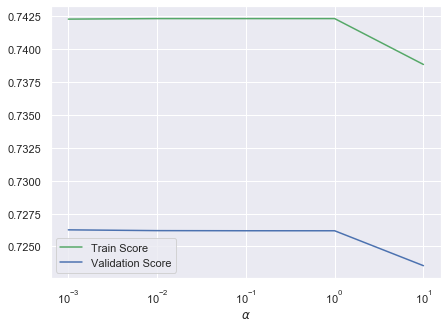

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.742264,0.726263,{'alpha': 1}
2,0.742303,0.726204,{'alpha': 0.1}
3,0.742304,0.726194,{'alpha': 0.01}
4,0.742304,0.726193,{'alpha': 0.001}
5,0.738820,0.723543,{'alpha': 10}


In [73]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_reg = GridSearchCV(Ridge(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ridge_reg.fit(X_train_PCA, y_train)
ridge_result = pd.DataFrame(ridge_reg.cv_results_)
ridge_result.index = ridge_result.rank_test_score
ridge_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(7, 5))
plt.plot(x_range, ridge_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

ridge_result[['mean_train_score', 'mean_test_score', 'params']]

In [74]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ridge_reg.best_params_, ridge_reg.best_score_))

Best Parameter: {'alpha': 1}
Average cross-validation score: 0.7263


In [75]:
print('R-squared score on Training set: {:.4f}'
     .format(ridge_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(ridge_reg.score(X_test_PCA, y_test)))
y_pred = ridge_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7410
R-squared score Test set: 0.7299
Mean square error: 22.8655
Mean absolute error: 3.1620


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8194 |                          0.8346 |                         0.8165 |             15.53 |                2.34 |
| with PCA    |                   0.7263 |                          0.7410 |                         0.7299 |             22.87 |                3.16 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### Lasso with PCA

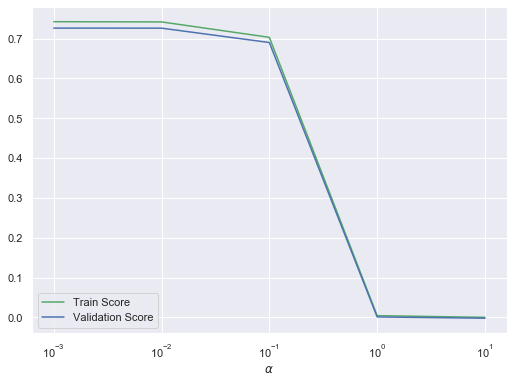

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.742298,0.726228,"{'alpha': 0.001, 'max_iter': 10000}"
2,0.741749,0.726079,"{'alpha': 0.01, 'max_iter': 10000}"
3,0.703070,0.690019,"{'alpha': 0.1, 'max_iter': 10000}"
4,0.004296,0.001074,"{'alpha': 1, 'max_iter': 10000}"
5,0.000000,-0.002140,"{'alpha': 10, 'max_iter': 10000}"


In [45]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[10000]}
lasso_reg = GridSearchCV(Lasso(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
lasso_reg.fit(X_train_PCA, y_train)
lasso_result = pd.DataFrame(lasso_reg.cv_results_)
lasso_result.index = lasso_result.rank_test_score
lasso_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(8.5, 6))
plt.plot(x_range, lasso_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

lasso_result[['mean_train_score', 'mean_test_score', 'params']]

In [46]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    lasso_reg.best_params_, lasso_reg.best_score_))

Best Parameter: {'alpha': 0.001, 'max_iter': 10000}
Average cross-validation score: 0.7262


In [47]:
print('R-squared score on Training set: {:.4f}'
     .format(lasso_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(lasso_reg.score(X_test_PCA, y_test)))
y_pred = lasso_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7410
R-squared score Test set: 0.7299
Mean square error: 22.8667
Mean absolute error: 3.1625


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8213 |                          0.8330 |                         0.8173 |             15.46 |                2.30 |
| with PCA    |                   0.7262 |                          0.7410 |                         0.7299 |             22.87 |                3.16 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### Polynomial Regression with PCA

In [48]:
for n in range(1,2):
    poly = PolynomialFeatures(n)
    X_train_PCA_poly = poly.fit_transform(X_train_PCA)
    X_test_PCA_poly = poly.transform(X_test_PCA)
    scores = cross_val_score(LinearRegression(), X_train_PCA_poly, y_train, cv=5)
    print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.69956247 0.78846469 0.70016389 0.67790778 0.7648669 ]


In [49]:
best_score = 0
for n in range(1,2):
    poly = PolynomialFeatures(n)
    X_train_PCA_poly = poly.fit_transform(X_train_PCA)
    X_test_PCA_poly = poly.transform(X_test_PCA)
    lreg.fit(X_train_PCA_poly, y_train)
    score = cross_val_score(LinearRegression(), X_train_PCA_poly, y_train, cv = 5).mean()
    if score > best_score:
            best_score = score
            best_parameters = {'degree': n}

print("Best parameters: {}".format(best_parameters))
print("Average cross-validation score: {:.4f}".format(best_score))

Best parameters: {'degree': 1}
Average cross-validation score: 0.7262


In [67]:
print('R-squared score on Training set: {:.4f}'
     .format(lreg.score(X_train_PCA_poly, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(lreg.score(X_test_PCA_poly, y_test)))
y_pred = lreg.predict(X_test_PCA_poly)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7410
R-squared score Test set: 0.7299
Mean square error: 22.8675
Mean absolute error: 3.1628


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8193 |                          0.8346 |                         0.8164 |             15.54 |                2.34 |
| with PCA    |                   0.7262 |                          0.7410 |                         0.7299 |             22.87 |                3.16 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### SVM Simple Regressor with PCA

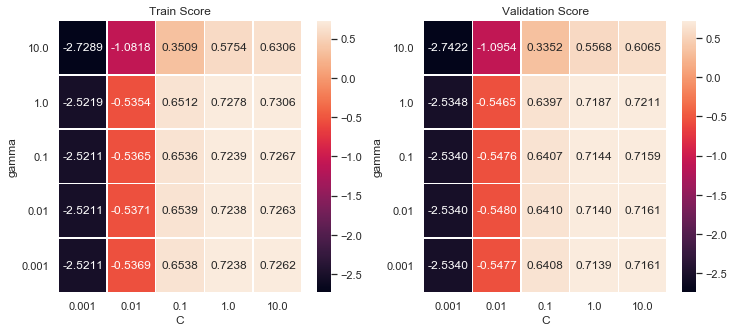

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.730588,0.721139,"{'C': 10, 'epsilon': 1}"
2,0.727796,0.718668,"{'C': 1, 'epsilon': 1}"
3,0.726277,0.716096,"{'C': 10, 'epsilon': 0.01}"
4,0.726193,0.716059,"{'C': 10, 'epsilon': 0.001}"
5,0.726682,0.715920,"{'C': 10, 'epsilon': 0.1}"
6,0.723898,0.714358,"{'C': 1, 'epsilon': 0.1}"
7,0.723814,0.713992,"{'C': 1, 'epsilon': 0.01}"
8,0.723811,0.713943,"{'C': 1, 'epsilon': 0.001}"
9,0.653892,0.641031,"{'C': 0.1, 'epsilon': 0.01}"


In [51]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}
linsvm_reg = GridSearchCV(LinearSVR(random_state=0),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
linsvm_reg.fit(X_train_PCA, y_train)
linsvm_result = pd.DataFrame(linsvm_reg.cv_results_)
linsvm_result.index = linsvm_result.rank_test_score
linsvm_result.sort_index(inplace=True)

results = pd.DataFrame(linsvm_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['epsilon'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['epsilon'])

# plot the mean cross-validation scores
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Train Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

linsvm_result[['mean_train_score', 'mean_test_score', 'params']]

In [52]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    linsvm_reg.best_params_, linsvm_reg.best_score_))

Best Parameter: {'C': 10, 'epsilon': 1}
Average cross-validation score: 0.7211


In [53]:
print('R-squared score on Training set: {:.4f}'
     .format(linsvm_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(linsvm_reg.score(X_test_PCA, y_test)))
y_pred = linsvm_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7296
R-squared score Test set: 0.7278
Mean square error: 23.0441
Mean absolute error: 2.9938


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8224 |                          0.8301 |                         0.8214 |             15.12 |                2.21 |
| with PCA    |                   0.7211 |                          0.7296 |                         0.7278 |             23.04 |                2.99 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### SVM With Linear Kernel Regressor with PCA

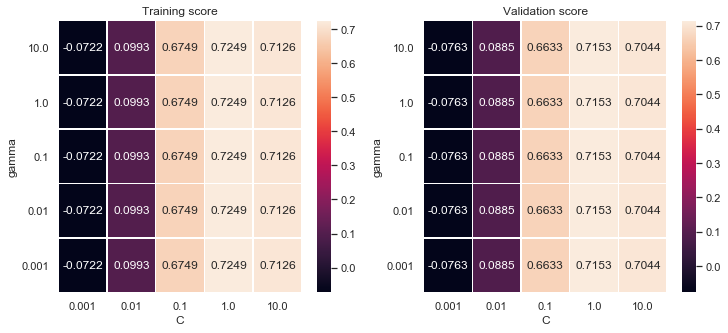

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.724868,0.715258,"{'C': 1, 'gamma': 10}"
1,0.724868,0.715258,"{'C': 1, 'gamma': 1}"
1,0.724868,0.715258,"{'C': 1, 'gamma': 0.1}"
1,0.724868,0.715258,"{'C': 1, 'gamma': 0.01}"
1,0.724868,0.715258,"{'C': 1, 'gamma': 0.001}"
6,0.712646,0.704429,"{'C': 10, 'gamma': 10}"
6,0.712646,0.704429,"{'C': 10, 'gamma': 0.1}"
6,0.712646,0.704429,"{'C': 10, 'gamma': 0.01}"
6,0.712646,0.704429,"{'C': 10, 'gamma': 0.001}"


In [54]:
# view the complete results
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svclinear_reg = GridSearchCV(SVR(kernel='linear', max_iter=2e3),
                             param_grid,
                             cv=5,
                             return_train_score=True,
                             scoring='r2')
svclinear_reg.fit(X_train_PCA, y_train)
svclinear_result = pd.DataFrame(svclinear_reg.cv_results_)
svclinear_result.index = svclinear_result.rank_test_score
svclinear_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svclinear_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svclinear_result[['mean_train_score', 'mean_test_score', 'params']]

In [55]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svclinear_reg.best_params_, svclinear_reg.best_score_))

Best Parameter: {'C': 1, 'gamma': 0.001}
Average cross-validation score: 0.7153


In [56]:
print('R-squared score on Training set: {:.4f}'
     .format(svclinear_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svclinear_reg.score(X_test_PCA, y_test)))
y_pred = svclinear_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.7239
R-squared score Test set: 0.7221
Mean square error: 23.5296
Mean absolute error: 2.9707


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8118 |                          0.8210 |                         0.8163 |             15.55 |                2.18 |
| with PCA    |                   0.7153 |                          0.7239 |                         0.7221 |             23.53 |                2.97 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### SVM With RBF Kernel Regressor with PCA

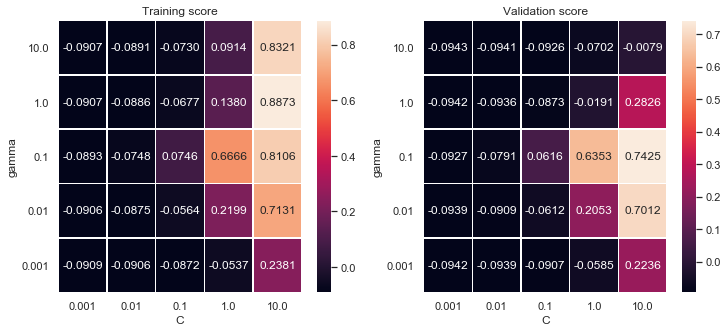

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.810623,0.742452,"{'C': 10, 'gamma': 0.1}"
2,0.713080,0.701203,"{'C': 10, 'gamma': 0.01}"
3,0.666593,0.635274,"{'C': 1, 'gamma': 0.1}"
4,0.887312,0.282592,"{'C': 10, 'gamma': 1}"
5,0.238053,0.223580,"{'C': 10, 'gamma': 0.001}"
6,0.219889,0.205305,"{'C': 1, 'gamma': 0.01}"
7,0.074567,0.061554,"{'C': 0.1, 'gamma': 0.1}"
8,0.832147,-0.007895,"{'C': 10, 'gamma': 10}"
9,0.138049,-0.019130,"{'C': 1, 'gamma': 1}"


In [57]:
# view the complete results
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
svcrbf_reg = GridSearchCV(SVR(kernel='rbf'),
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring='r2')
svcrbf_reg.fit(X_train_PCA, y_train)
svcrbf_result = pd.DataFrame(svcrbf_reg.cv_results_)
svcrbf_result.index = svcrbf_result.rank_test_score
svcrbf_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svcrbf_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svcrbf_result[['mean_train_score', 'mean_test_score', 'params']]

In [58]:
print('Best Parameter: {0}\nAverage cross-vlidation score: {1:.4f}'.format(
    svcrbf_reg.best_params_, svcrbf_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-vlidation score: 0.7425


In [59]:
print('R-squared score on Training set: {:.4f}'
     .format(svcrbf_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svcrbf_reg.score(X_test_PCA, y_test)))
y_pred = svcrbf_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8104
R-squared score Test set: 0.7641
Mean square error: 19.9665
Mean absolute error: 2.7068


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8100 |                          0.8686 |                         0.8191 |             15.31 |                2.15 |
| with PCA    |                   0.7425 |                          0.8104 |                         0.7641 |             19.97 |                2.71 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is less significant.__

#### SVM With Polynomial Kernel Regressor with PCA

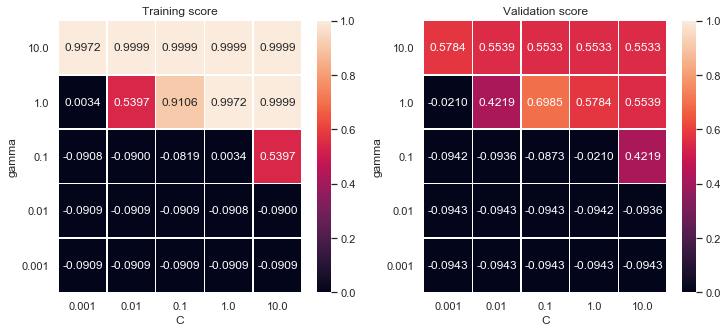

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.910612,0.698472,"{'C': 0.1, 'gamma': 1}"
2,0.997238,0.578399,"{'C': 1, 'gamma': 1}"
3,0.997238,0.578399,"{'C': 0.001, 'gamma': 10}"
4,0.999884,0.553909,"{'C': 0.01, 'gamma': 10}"
5,0.999884,0.553908,"{'C': 10, 'gamma': 1}"
6,0.999888,0.553278,"{'C': 10, 'gamma': 10}"
7,0.999888,0.553278,"{'C': 1, 'gamma': 10}"
8,0.999888,0.553278,"{'C': 0.1, 'gamma': 10}"
9,0.539665,0.421909,"{'C': 10, 'gamma': 0.1}"


In [60]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svrpoly_reg = GridSearchCV(SVR(kernel = 'poly'),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
svrpoly_reg.fit(X_train_PCA, y_train)
svrpoly_result = pd.DataFrame(svrpoly_reg.cv_results_)
svrpoly_result.index = svrpoly_result.rank_test_score
svrpoly_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svrpoly_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, vmax=1, vmin=0,annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, vmax=1, vmin=0, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svrpoly_result[['mean_train_score', 'mean_test_score', 'params']]

In [61]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svrpoly_reg.best_params_, svrpoly_reg.best_score_))

Best Parameter: {'C': 0.1, 'gamma': 1}
Average cross-validation score: 0.6985


In [62]:
print('R-squared score on Training set: {:.4f}'
     .format(svrpoly_reg.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(svrpoly_reg.score(X_test_PCA, y_test)))
y_pred = svrpoly_reg.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.9037
R-squared score Test set: 0.7169
Mean square error: 23.9656
Mean absolute error: 3.2619


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.8112 |                          0.8935 |                         0.8127 |             15.85 |                2.37 |
| with PCA    |                   0.6985 |                          0.9037 |                         0.7169|             23.97 |                3.26 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is significant.__

#### Decision Tree Regression with PCA

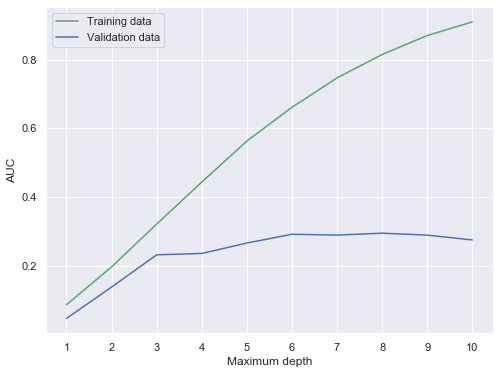

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.814932,0.294327,{'max_depth': 8}
2,0.661114,0.291155,{'max_depth': 6}
3,0.746767,0.288786,{'max_depth': 7}
4,0.870192,0.288676,{'max_depth': 9}
5,0.909927,0.274632,{'max_depth': 10}
6,0.562673,0.265606,{'max_depth': 5}
7,0.443204,0.235224,{'max_depth': 4}
8,0.320947,0.231317,{'max_depth': 3}
9,0.196046,0.137323,{'max_depth': 2}


In [88]:
depth = list(range(1, 11))
param_grid = {'max_depth': depth}
dtree = DecisionTreeRegressor(random_state=0)
dtree_clf = GridSearchCV(dtree,
                         param_grid,
                         cv=5,
                         scoring='r2',
                         return_train_score=True)
dtree_clf.fit(X_train_PCA, y_train)

# view the complete results
results = pd.DataFrame(dtree_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = depth

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training data', c='g')
plt.plot(x_axis, test_scores, label='Validation data', c='b')
plt.xlabel('Maximum depth')
plt.ylabel('AUC')
plt.xticks(range(1, len(depth) + 1), depth)
plt.legend()
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [64]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    dtree_clf.best_params_, dtree_clf.best_score_))

Best Parameter: {'max_depth': 8}
Average cross-validation score: 0.2943


In [65]:
print('R-squared score on Training set: {:.4f}'
     .format(dtree_clf.score(X_train_PCA, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(dtree_clf.score(X_test_PCA, y_test)))
y_pred = dtree_clf.predict(X_test_PCA)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8242
R-squared score Test set: 0.3054
Mean square error: 58.7985
Mean absolute error: 4.7681


|             | Average validation score | R-squared score on training set | R-squared score on testing set | Mean square error | Mean absolute error |
|-------------|--------------------------|---------------------------------|--------------------------------|-------------------|---------------------|
| without PCA |                   0.7105 |                          0.9119 |                         0.6377 |             30.67 |                2.81 |
| with PCA    |                   0.2943 |                          0.8242|                         0.3054 |             58.80 |                4.77 |

<font color='DARKGREEN'>__Both R-squared score on testing set and Mean sqaure error are poor with PCA, which is very material. Also, this model has overfitting problem.__

### Deep learning

In [107]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
    return model

In [111]:
model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {'batch_size': [16, 32, 64, 128], 'epochs': [100, 500, 1000]}
deep_grid = GridSearchCV(model,
                         param_grid,
                         cv=5,
                         scoring='r2',
                         return_train_score=True)
deep_grid.fit(X_train, y_train)
deep_grid_result = pd.DataFrame(deep_grid.cv_results_)
deep_grid_result.index = deep_grid_result.rank_test_score
deep_grid_result.sort_index(inplace=True)
deep_grid_result[['mean_train_score', 'mean_test_score', 'params']]

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.874617,0.826478,"{'batch_size': 64, 'epochs': 100}"
2,0.855821,0.824775,"{'batch_size': 128, 'epochs': 100}"
3,0.910409,0.805401,"{'batch_size': 128, 'epochs': 500}"
4,0.879246,0.799356,"{'batch_size': 32, 'epochs': 100}"
5,0.913429,0.797722,"{'batch_size': 16, 'epochs': 100}"
6,0.927369,0.783549,"{'batch_size': 64, 'epochs': 500}"
7,0.921490,0.774911,"{'batch_size': 128, 'epochs': 1000}"
8,0.943129,0.761219,"{'batch_size': 64, 'epochs': 1000}"
9,0.945882,0.759993,"{'batch_size': 32, 'epochs': 500}"


In [112]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    deep_grid.best_params_, deep_grid.best_score_))

Best Parameter: {'batch_size': 64, 'epochs': 100}
Average cross-validation score: 0.8265


In [113]:
print('R-squared score on Training set: {:.4f}'
     .format(deep_grid.score(X_train, y_train)))
print('R-squared score Test set: {:.4f}'
     .format(deep_grid.score(X_test, y_test)))
y_pred = deep_grid.predict(X_test)
print('Mean square error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared score on Training set: 0.8853
R-squared score Test set: 0.8305
Mean square error: 14.3509
Mean absolute error: 2.1580


<font color='DARKGREEN'>__Summary__  
With Deep learning regression, the R-squared score on test set is 0.8305 and Mean square error is 14.35. Thus, the best model for price pprediction of Uber and Lyft data is Deep learning as it has highest R-squared score on test set and lowest Mean square error. In addition, it seems that Deep learning model is not overfitting.</font>